In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ISHANT\OneDrive\Desktop\jobs\job_title_des.csv")
print(df)

      Unnamed: 0              Job Title  \
0              0      Flutter Developer   
1              1       Django Developer   
2              2       Machine Learning   
3              3          iOS Developer   
4              4   Full Stack Developer   
...          ...                    ...   
2272        2399      Backend Developer   
2273        2400   Full Stack Developer   
2274        2401  Network Administrator   
2275        2402       Machine Learning   
2276        2403   Full Stack Developer   

                                        Job Description  
0     We are looking for hire experts flutter develo...  
1     PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2     Data Scientist (Contractor)\n\nBangalore, IN\n...  
3     JOB DESCRIPTION:\n\nStrong framework outside o...  
4     job responsibility full stack engineer – react...  
...                                                 ...  
2272  Job Summary\nPublished on : 26 days ago\nVacan...  
2273  business enti

In [ ]:
df.head()


,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


In [5]:
df.shape

(2277, 3)

In [6]:
df.isnull().sum()
df.fillna('',inplace=True)
df.isnull().sum()

Unnamed: 0         0
Job Title          0
Job Description    0
dtype: int64

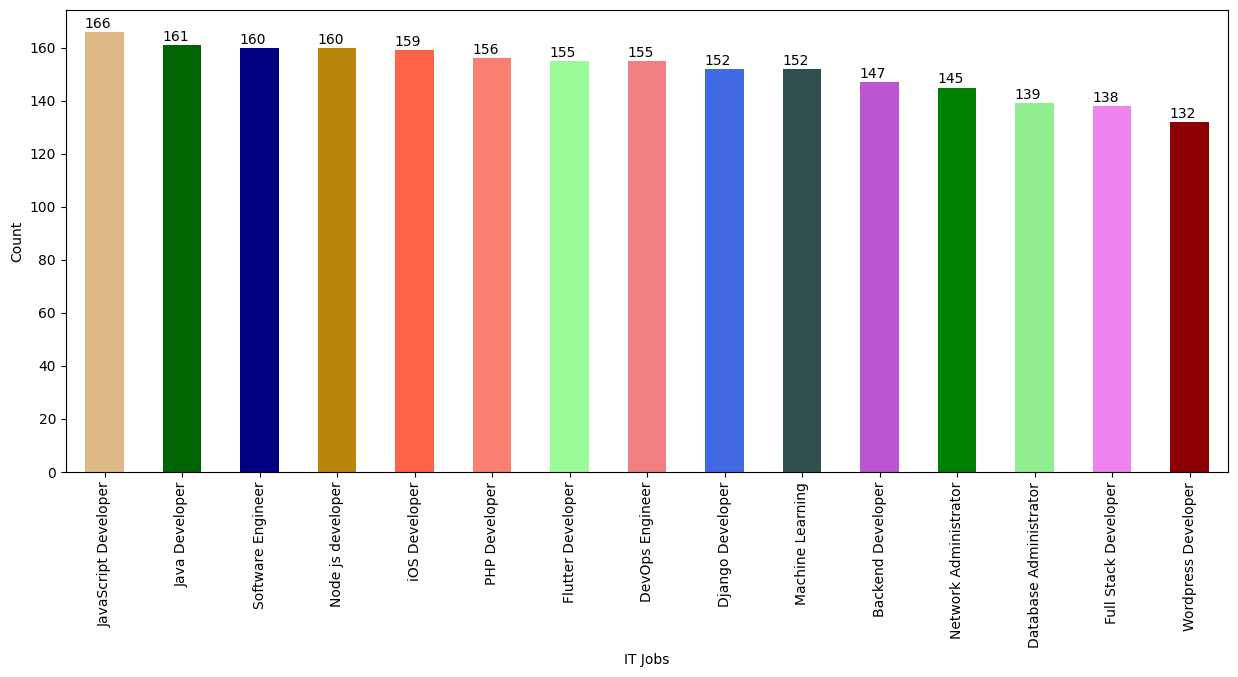

In [7]:
import matplotlib.pyplot as plt
import random
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(91)
c = random.choices(all_colors, k=16)
frequencies = df['Job Title'].value_counts().values
freq_series = pd.Series(frequencies)
x_labels = df['Job Title'].value_counts().index
plt.figure(figsize=(15, 6))
ax = freq_series.plot(kind='bar', color=c)
ax.set_xlabel('IT Jobs')
ax.set_ylabel('Count')
ax.set_xticklabels(x_labels)
rects = ax.patches
labels = frequencies
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 3, height + .5, label,
            ha='center', va='bottom')

In [8]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')

In [6]:
df = df.rename(columns={'Job Title': 'Title'})  

In [7]:
df['new_col'] = df['Title']+" "+ df['Job Description']

In [11]:
df.head(3)

,Unnamed: 0,Title,Job Description,new_col
0,0,Flutter Developer,We are looking for hire experts flutter develo...,Flutter Developer We are looking for hire expe...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...,Django Developer PYTHON/DJANGO (Developer/Lead...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n...",Machine Learning Data Scientist (Contractor)\n...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
import scipy

In [16]:
tfidf = TfidfVectorizer() 
matrix = tfidf.fit_transform(df['new_col']) 
similarity =cosine_similarity(matrix)


In [17]:
scipy.sparse.save_npz("sparse_matrix.npz", matrix)

In [10]:
enumerate(similarity[0])

In [ ]:
def recommendation(title): #recommendation based on job title
    
    indx = df[df['Title'] == title].index[0]
    indx = df.index.get_loc(indx) 
    

    distances = sorted(list(enumerate(similarity[indx])), key=lambda x: x[1], reverse=False)[1:20]
    
    jobs = []
    for i in distances:
        
        job_title = df.iloc[i[0]]['Title']
        job_description = df.iloc[i[0]]['Job Description']  
        jobs.append((job_title, job_description, i[1]))
    
    
    for job in jobs:
        print(f"Job Title: {job[0]}")
        print(f"Job Description: {job[1]}")
        print(f"Similarity: {job[2]:.2f}")
        print("-" * 50)

In [ ]:
#recommendation('Full Stack Developer')

In [ ]:
def recommendation(job_description_input):
    tfidf=joblib.load("tfidf_vectorizer.pkl")
    tfidf_matrix = scipy.sparse.load_npz("sparse_matrix.npz")
    job_desc_vec = tfidf.transform([job_description_input])  
    cosine_sim = cosine_similarity(job_desc_vec, tfidf_matrix).flatten()
    distances = sorted(list(enumerate(cosine_sim)), key=lambda x: x[1], reverse=True)[1:6] 

    jobs = []
    for i in distances:
        
        job_title = df.iloc[i[0]]['Title']  
        job_description = df.iloc[i[0]]['Job Description']  
        similarity_score = i[1] 
        jobs.append((job_title, job_description, similarity_score))  
    
    
    return jobs

In [22]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import joblib

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [18]:
df['Job Description']

0       We are looking for hire experts flutter develo...
1       PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2       Data Scientist (Contractor)\n\nBangalore, IN\n...
3       JOB DESCRIPTION:\n\nStrong framework outside o...
4       job responsibility full stack engineer – react...
                              ...                        
2272    Job Summary\nPublished on : 26 days ago\nVacan...
2273    business entity cisco umbrella focus cloud-bas...
2274    Urgently reqd in a college in Mohali\nNetwork ...
2275    Key Responsibilities: Team leads for small or ...
2276    leslie hindman auctioneer one nation 's leadin...
Name: Job Description, Length: 2277, dtype: object

In [21]:
recommendation(' We are looking for hire experts flutter developer')

[('Flutter Developer',
  'Urgent Opening for Flutter Developer to develop mobile apps development\n\nStrong knowledge in Flutter, Hybrid, React Native, Google Map\n\nRoles & Responsibility: -\n\n\\* Developing mobile applications in Flutter\n\n\\* Create multi platform apps for iOS/ Android using\n\n\\* Flutter development framework\n\n\\* Flutter SDK and Dart programming language\n\nSkills Required: -\n\nFlutter, Dart, Firebase, iOS & Android development, Hybrid, Restful APIs, Flutter UI, Google Cloud\n\nReact Native, Google Maps\n\nExperience: - Must have 2 years experience\n\nPreference to immediate joiners\n\nJob Types: Full-time, work from home\n\nJob Type: Full-time\n\nSalary: ₹200,000.00 - ₹400,000.00 per year\n\nSchedule:\nDay shift\nWork Remotely:\nTemporarily due to COVID-19',
  np.float64(0.30984354557400584)),
 ('Flutter Developer',
  "We are looking for self-motivated Flutter Developer with excellent communication and customer service skills to join a fast-growing startup 